In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import requests
import json
import re
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

warnings.filterwarnings('ignore')

In [ ]:
def get_poke(pokemon):
    poke = dict()
    poke['id'] = pokemon['id']
    poke['name'] = pokemon['name']
    poke['base_experience'] = pokemon['base_experience']
    poke['height'] = pokemon['height']
    poke['is_default'] = pokemon['is_default']
    poke['order'] = pokemon['order']
    poke['weight'] = pokemon['weight']
    poke['abilities'] = json.dumps(pokemon['abilities'])
    poke['forms'] = json.dumps(pokemon['forms'])
    poke['game_indices'] = json.dumps(pokemon['game_indices'])
    poke['held_items'] = json.dumps(pokemon['held_items'])
    poke['location_area_encounters'] = pokemon['location_area_encounters']
    poke['moves'] = json.dumps(pokemon['moves'])
    poke['past_types'] = json.dumps(pokemon['past_types'])
    poke['sprites'] = json.dumps(pokemon['sprites'])
    poke['species'] = pokemon['species']
    poke['stats'] = json.dumps(pokemon['stats'])
    poke['types'] = json.dumps(pokemon['types'])
    return poke

url = 'https://pokeapi.co/api/v2/pokemon?limit=100000&offset=0'
r = requests.get(url)

df = pd.DataFrame()
for i, poke in enumerate(r.json()['results']):
    if i%100 == 0:
        print(i)
    url = poke['url']
    
    pokemon = requests.get(url).json()
    poke = get_poke(pokemon)
    df_local = pd.DataFrame(poke, index=[0])
    df = pd.concat([df, df_local])

In [ ]:
def get_move(move):
    move_dict = dict()
    move_dict['id'] = move['id']
    move_dict['name'] = move['name']
    move_dict['accuracy'] = move['accuracy']
    move_dict['effect_chance'] = move['effect_chance']
    move_dict['pp'] = move['pp']
    move_dict['power'] = move['power']
    move_dict['damage_class'] = move['damage_class']['name']
    if len(move['effect_entries']) == 1:
        move_dict['effect_entries'] = move['effect_entries'][0]['effect']
    elif len(move['effect_entries']) > 1:
        move_dict['effect_entries'] = json.dumps(move['effect_entries'])
    else:
        move_dict['effect_entries'] = np.nan
    move_dict['meta'] = json.dumps(move['meta'])
    if move['meta']:
        move_dict['ailment'] = move['meta']['ailment']['name']
        move_dict['ailment_chance'] = move['meta']['ailment_chance']
        move_dict['category'] = move['meta']['category']['name']
        move_dict['crit_rate'] = move['meta']['crit_rate']
        move_dict['drain'] = move['meta']['drain']
        move_dict['flinch_chance'] = move['meta']['flinch_chance']
        move_dict['healing'] = move['meta']['healing']
        move_dict['max_hits'] = move['meta']['max_hits']
        move_dict['max_turns'] = move['meta']['max_turns']
        move_dict['min_hits'] = move['meta']['min_hits']
        move_dict['min_turns'] = move['meta']['min_turns']
        move_dict['stat_chance'] = move['meta']['stat_chance']
    else:
        move_dict['ailment'] = np.nan
        move_dict['ailment_chance'] = np.nan
        move_dict['category'] = np.nan
        move_dict['crit_rate'] = np.nan
        move_dict['drain'] = np.nan
        move_dict['flinch_chance'] = np.nan
        move_dict['healing'] = np.nan
        move_dict['max_hits'] = np.nan
        move_dict['max_turns'] = np.nan
        move_dict['min_hits'] = np.nan
        move_dict['min_turns'] = np.nan
        move_dict['stat_chance'] = np.nan
    move_dict['stat_changes'] = json.dumps(move['stat_changes'])
    move_dict['target'] = move['target']['name']
    move_dict['type'] = move['type']['name']
    return move_dict

In [ ]:
url = 'https://pokeapi.co/api/v2/move?limit=100000&offset=0'
r = requests.get(url)

df_moves = pd.DataFrame()
for i, result in enumerate(r.json()['results']):
    if i%100 == 0:
        print(i)
    url = result['url']
    
    move = requests.get(url).json()
    move_info = get_move(move)
    df_local = pd.DataFrame(move_info, index=[move_info['id']])
    df_moves = pd.concat([df_moves, df_local])

df_moves.to_pickle('moves.pkl')

# Pre-process data

In [2]:
data = pd.read_pickle('poke.pkl')

In [3]:
data

id                     name base_experience  height  is_default  order  \
0       1                bulbasaur              64       7        True      1   
0       2                  ivysaur             142      10        True      2   
0       3                 venusaur             263      20        True      3   
0       4               charmander              62       6        True      5   
0       5               charmeleon             142      11        True      6   
..    ...                      ...             ...     ...         ...    ...   
0   10267   koraidon-gliding-build            None      35       False     -1   
0   10268  miraidon-low-power-mode            None      28       False     -1   
0   10269      miraidon-drive-mode            None      28       False     -1   
0   10270    miraidon-aquatic-mode            None      28       False     -1   
0   10271      miraidon-glide-mode            None      28       False     -1   

    weight                                          abilities  \
0       69  [{"ability": {"name": "overgrow", "url": "http...   
0      130  [{"ability": {"name": "overgrow", "url": "http...   
0     1000  [{"ability": {"name": "overgrow", "url": "http...   
0       85  [{"ability": {"name": "blaze", "url": "https:/...   
0      190  [{"ability": {"name": "blaze", "url": "https:/...   
..     ...                                                ...   
0     3030  [{"ability": {"name": "orichalcum-pulse", "url...   
0     2400  [{"ability": {"name": "hadron-engine", "url": ...   
0     2400  [{"ability": {"name": "hadron-engine", "url": ...   
0     2400  [{"ability": {"name": "hadron-engine", "url": ...   
0     2400  [{"ability": {"name": "hadron-engine", "url": ...   

                                                forms  \
0   [{"name": "bulbasaur", "url": "https://pokeapi...   
0   [{"name": "ivysaur", "url": "https://pokeapi.c...   
0   [{"name": "venusaur", "url": "https://pokeapi....   
0   [{"name": "charmander", "url": "https://pokeap...   
0   [{"name": "charmeleon", "url": "https://pokeap...   
..                                                ...   
0   [{"name": "koraidon-gliding-build", "url": "ht...   
0   [{"name": "miraidon-low-power-mode", "url": "h...   
0   [{"name": "miraidon-drive-mode", "url": "https...   
0   [{"name": "miraidon-aquatic-mode", "url": "htt...   
0   [{"name": "miraidon-glide-mode", "url": "https...   

                                         game_indices held_items  \
0   [{"game_index": 153, "version": {"name": "red"...         []   
0   [{"game_index": 9, "version": {"name": "red", ...         []   
0   [{"game_index": 154, "version": {"name": "red"...         []   
0   [{"game_index": 176, "version": {"name": "red"...         []   
0   [{"game_index": 178, "version": {"name": "red"...         []   
..                                                ...        ...   
0                                                  []         []   
0                                                  []         []   
0                                                  []         []   
0                                                  []         []   
0                                                  []         []   

                             location_area_encounters  \
0      https://pokeapi.co/api/v2/pokemon/1/encounters   
0      https://pokeapi.co/api/v2/pokemon/2/encounters   
0      https://pokeapi.co/api/v2/pokemon/3/encounters   
0      https://pokeapi.co/api/v2/pokemon/4/encounters   
0      https://pokeapi.co/api/v2/pokemon/5/encounters   
..                                                ...   
0   https://pokeapi.co/api/v2/pokemon/10267/encoun...   
0   https://pokeapi.co/api/v2/pokemon/10268/encoun...   
0   https://pokeapi.co/api/v2/pokemon/10269/encoun...   
0   https://pokeapi.co/api/v2/pokemon/10270/encoun...   
0   https://pokeapi.co/api/v2/pokemon/10271/encoun...   

                                                moves past_types  

In [4]:
def create_stats_types(df):
    for i, row in df.iterrows():
        stats = json.loads(row['stats'])
        df.loc[i,'hp'] = stats[0]['base_stat']
        df.loc[i,'atk'] = stats[1]['base_stat']
        df.loc[i,'def'] = stats[2]['base_stat']
        df.loc[i,'spatk'] = stats[3]['base_stat']
        df.loc[i,'spdef'] = stats[4]['base_stat']
        df.loc[i,'spd'] = stats[5]['base_stat']
    
        types = json.loads(row['types'])
        df.loc[i,'type1'] = types[0]['type']['name']
        try:
            df.loc[i,'type2'] = types[1]['type']['name']
        except:
            df.loc[i,'type2'] = np.nan
            
    types = df['type1'].unique()
    df = pd.concat([df, df[['type1','type2']].stack().str.get_dummies().sum(level=0)], axis=1)
    df.drop('stats', axis=1, inplace=True)
    df.drop('types', axis=1, inplace=True)
    df.drop('type1', axis=1, inplace=True)
    df.drop('type2', axis=1, inplace=True)
    return(df, types)


def create_gen(df):
    bins = [0, 151, 251, 386, 493, 649, 721, 809, 905, 1008, np.inf]
    gen = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    df['gen'] = pd.cut(df.index, bins=bins, labels=gen)
    return(df)


def create_leg(df):
    # Legendary ids
    leg_id = np.array([144, 145, 146, 150,
                       243, 244, 245, 249, 250,
                       377, 378, 379, 380, 381, 382, 383, 384,
                       480, 481, 482, 483, 484, 487, 488, 485, 486,
                       638, 639, 640, 641, 642, 645, 643, 644, 646,
                       716, 717, 718,
                       772, 773, 785, 786, 787, 788, 789, 790, 791, 792, 800,
                       888, 889, 890, 891, 892, 894, 895, 896, 897, 898, 905,
                       1001, 1002, 1003, 1004, 1007, 1008,
                      ])
    leg_id -= 1 # Since python starts from 0
    mask = np.zeros(df.shape[0], bool)
    mask[leg_id] = True
    df['leg'] = np.where(mask, True, False)
    return df


def create_myt(df):
    # Mythical ids
    myt_id = np.array([151,
                       251,
                       385, 386,
                       489, 490, 491, 492, 493,
                       494, 647, 648, 649,
                       719, 720, 721,
                       801, 802, 807, 808, 809,
                       893,
                      ])
    myt_id -= 1 # Since python starts from 0
    mask = np.zeros(df.shape[0], bool)
    mask[myt_id] = True
    df['myt'] = np.where(mask, True, False)
    return df


def create_pleg(df):
    # Fan term pseudo-legendary ids
    pleg_id = np.array([149,
                        248,
                        373, 376,
                        445,
                        635,
                        706,
                        784,
                        887,
                        998,
                       ])
    pleg_id -= 1 # Since python starts from 0
    mask = np.zeros(df.shape[0], bool)
    mask[pleg_id] = True
    df['p_leg'] = np.where(mask, True, False)
    return df


def create_ub(df):
    # Ultra beasts ids
    ub_id = np.array([793, 794, 795, 796, 797, 798, 799, 803, 804, 805, 806,])
    ub_id -= 1 # Since python starts from 0
    mask = np.zeros(df.shape[0], bool)
    mask[ub_id] = True
    df['ub'] = np.where(mask, True, False)
    return df

In [5]:
df = data[['id', 'name', 'height', 'weight', 'stats', 'types', 'moves']]
df.set_index('id', inplace=True)

df, types = create_stats_types(df)
df = create_gen(df)
df = create_leg(df)
df = create_myt(df)
df = create_pleg(df)
df = create_ub(df)

In [6]:
def get_pikachu(df):
    cols = ['leg','myt','p_leg','ub']
    pikachu_ids = [10080, 10081, 10082, 10083, 10084, 10085]
    for i in pikachu_ids:
        df.loc[i, 'gen'] = 6
        df.loc[i, cols] = df.loc[25, cols]
    
    pikachu_ids = [10094, 10095, 10096, 10097, 10098, 10099, 10148, 10158, 10160]
    for i in pikachu_ids:
        df.loc[i, 'gen'] = 7
        df.loc[i, cols] = df.loc[25, cols]
    return(df)


def get_specifics(df):
    cols = ['leg','myt','p_leg','ub']
    # Greninja
    ids = [10116, 10117]
    for i in ids:
        df.loc[i, 'gen'] = 7
        df.loc[i, cols] = df.loc[658, cols]
        
    # Eevee-Starter
    i = 10159
    df.loc[i, 'gen'] = 7
    df.loc[i, cols] = df.loc[133, cols]
        
    # Dialga Origin form
    i = 10245
    df.loc[i, 'gen'] = 8
    df.loc[i, cols] = df.loc[483, cols]
    
    # Palkia Origin form
    i = 10246
    df.loc[i, 'gen'] = 8
    df.loc[i, cols] = df.loc[484, cols]
    
    return(df)


def create_forms(df):
    cols = ['gen','leg','myt','p_leg','ub']
    poke_names = ['deoxys', 'castform',
                  'wormadam', 'shaymin', 'giratina', 'rotom',
                  'basculin', 'darmanitan', 'meloetta', 'tornadus', 'thundurus', 'landorus', 'kyurem', 'keldeo',
                  'meowstic', 'aegislash', 'pumpkaboo', 'gourgeist', 'floette', 'hoopa', 'zygarde',
                  'oricorio', 'lycanroc', 'wishiwashi', 'minior', 'mimikyu', 'magearna', 'rockruff', 'necrozma',
                  'cramorant', 'toxtricity', 'eiscue', 'indeedee', 'morpeko', 'zacian', 'zamazenta', 'eternatus',
                  'urshifu', 'zarude', 'calyrex', 'basculegion', 'enamorus',
                  'oinkologne', 'dudunsparce', 'palafin', 'maushold', 'tatsugiri', 'squawkabilly', 'gimmighoul',
                  'koraidon', 'miraidon']
    for name in poke_names:
        idxs = df[df['name'].str.contains(name)].index
        for i in idxs[1:]:
            df.loc[i, cols] = df.loc[idxs[0], cols]
    return(df)
    
    
def create_mega(df):
    df['mega'] = False
    cols = ['leg','myt','p_leg','ub']
    poke_names = df[df['name'].str.contains('-mega')]['name']
    poke_names = pd.concat([poke_names, df[df['name'].str.contains('-primal')]['name']])
    for name in poke_names:
        if re.search("(.*)-mega", name):
            idxs = df[df['name'].str.contains(re.search("(.*)-mega", name)[1])].index
        elif re.search("(.*)-primal", name):
            idxs = df[df['name'].str.contains(re.search("(.*)-primal", name)[1])].index
        for i in idxs[1:]:
            if '-mega' in df.loc[i, 'name'] or '-primal' in df.loc[i, 'name']:
                df.loc[i, 'gen'] = 6
                df.loc[i, cols] = df.loc[idxs[0], cols]
                df.loc[i, 'mega'] = True
    return(df)


def create_alola(df):
    df['alola'] = False
    cols = ['leg','myt','p_leg','ub']
    poke_names = df[df['name'].str.contains('-alola')]['name']
    for name in poke_names:
        if re.search("(.*)-alola", name):
            if name != 'pikachu-alola-cap':
                idxs = df[df['name'].str.contains(re.search("(.*)-alola", name)[1])].index
        for i in idxs[1:]:
            if '-alola' in df.loc[i, 'name']:
                df.loc[i, 'gen'] = 7
                df.loc[i, cols] = df.loc[idxs[0], cols]
                df.loc[i, 'alola'] = True
    return(df)


def create_gmax(df):
    df['gmax'] = False
    cols = ['leg','myt','p_leg','ub']
    poke_names = df[df['name'].str.contains('-gmax')]['name']
    for name in poke_names:
        if re.search("(.*)-gmax", name):
            idxs = df[df['name'].str.contains(re.search("(.*)-gmax", name)[1])].index
        for i in idxs[1:]:
            if '-gmax' in df.loc[i, 'name']:
                df.loc[i, 'gen'] = 8
                df.loc[i, cols] = df.loc[idxs[0], cols]
                df.loc[i, 'gmax'] = True
                df.loc[i, 'moves'] = df.loc[idxs[0], 'moves']
    return(df)


def create_galar(df):
    df['galar'] = False
    cols = ['leg','myt','p_leg','ub']
    poke_names = df[df['name'].str.contains('-galar')]['name']
    for name in poke_names:
        if re.search("(.*)-galar", name):
            idxs = df[df['name'].str.contains(re.search("(.*)-galar", name)[1])].index
        for i in idxs[1:]:
            if '-galar' in df.loc[i, 'name']:
                df.loc[i, 'gen'] = 8
                df.loc[i, cols] = df.loc[idxs[0], cols]
                df.loc[i, 'galar'] = True
    return(df)


def create_hisui(df):
    df['hisui'] = False
    cols = ['leg','myt','p_leg','ub']
    poke_names = df[df['name'].str.contains('-hisui')]['name']
    for name in poke_names:
        if re.search("(.*)-hisui", name):
            idxs = df[df['name'].str.contains(re.search("(.*)-hisui", name)[1])].index
        for i in idxs[1:]:
            if '-hisui' in df.loc[i, 'name']:
                df.loc[i, 'gen'] = 8
                df.loc[i, cols] = df.loc[idxs[0], cols]
                df.loc[i, 'hisui'] = True
    return(df)


def create_paldea(df):
    df['paldea'] = False
    cols = ['leg','myt','p_leg','ub']
    poke_names = df[df['name'].str.contains('-paldea')]['name']
    for name in poke_names:
        if re.search("(.*)-paldea", name):
            idxs = df[df['name'].str.contains(re.search("(.*)-paldea", name)[1])].index
        for i in idxs[1:]:
            if '-paldea' in df.loc[i, 'name']:
                df.loc[i, 'gen'] = 9
                df.loc[i, cols] = df.loc[idxs[0], cols]
                df.loc[i, 'paldea'] = True
    return(df)

        
def get_forms(df):
    df = get_pikachu(df)
    df = get_specifics(df)
    df = create_forms(df)
    df = create_mega(df)
    df = create_alola(df)
    df = create_gmax(df)
    df = create_galar(df)
    df = create_hisui(df)
    df = create_paldea(df)
    return(df)

df = get_forms(df)

In [7]:
# Remove duplicate pokemons (not considering name and moves)
cols = list(df.columns)
cols.remove('name')
cols.remove('moves')

df = df[~df['name'].str.contains('-totem')]
df = df.drop(10190) # eternatus-eternamax
df = df.drop(10194) # calyrex-shadow

df.drop_duplicates(subset=cols, keep='first', inplace=True)

In [8]:
df.shape

(1215, 39)

In [9]:
df.columns

Index(['name', 'height', 'weight', 'moves', 'hp', 'atk', 'def', 'spatk',
       'spdef', 'spd', 'bug', 'dark', 'dragon', 'electric', 'fairy',
       'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice',
       'normal', 'poison', 'psychic', 'rock', 'steel', 'water', 'gen', 'leg',
       'myt', 'p_leg', 'ub', 'mega', 'alola', 'gmax', 'galar', 'hisui',
       'paldea'],
      dtype='object')

In [10]:
types

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [11]:
df

name  height  weight  \
id                                                
1                     bulbasaur       7      69   
2                       ivysaur      10     130   
3                      venusaur      20    1000   
4                    charmander       6      85   
5                    charmeleon      11     190   
...                         ...     ...     ...   
10256              palafin-hero      18     974   
10257  maushold-family-of-three       3      28   
10263        gimmighoul-roaming       1      10   
10264    koraidon-limited-build      35    3030   
10268   miraidon-low-power-mode      28    2400   

                                                   moves     hp    atk    def  \
id                                                                              
1      [{"move": {"name": "razor-wind", "url": "https...   45.0   49.0   49.0   
2      [{"move": {"name": "swords-dance", "url": "htt...   60.0   62.0   63.0   
3      [{"move": {"name": "swords-dance", "url": "htt...   80.0   82.0   83.0   
4      [{"move": {"name": "mega-punch", "url": "https...   39.0   52.0   43.0   
5      [{"move": {"name": "mega-punch", "url": "https...   58.0   64.0   58.0   
...                                                  ...    ...    ...    ...   
10256  [{"move": {"name": "ice-punch", "url": "https:...  100.0  160.0   97.0   
10257  [{"move": {"name": "take-down", "url": "https:...   74.0   75.0   70.0   
10263  [{"move": {"name": "tackle", "url": "https://p...   45.0   30.0   25.0   
10264  [{"move": {"name": "swords-dance", "url": "htt...  100.0  135.0  115.0   
10268  [{"move": {"name": "swords-dance", "url": "htt...  100.0   85.0  100.0   

       spatk  spdef    spd  ...    leg    myt  p_leg     ub   mega  alola  \
id                          ...                                             
1       65.0   65.0   45.0  ...  False  False  False  False  False  False   
2       80.0   80.0   60.0  ...  False  False  False  False  False  False   
3      100.0  100.0   80.0  ...  False  False  False  False  False  False   
4       60.0   50.0   65.0  ...  False  False  False  False  False  False   
5       80.0   65.0   80.0  ...  False  False  False  False  False  False   
...      ...    ...    ...  ...    ...    ...    ...    ...    ...    ...   
10256  106.0   87.0  100.0  ...  False  False  False  False  False  False   
10257   65.0   75.0  111.0  ...  False  False  False  False  False  False   
10263   75.0   45.0   80.0  ...  False  False  False  False  False  False   
10264   85.0  100.0  135.0  ...   True  False  False  False  False  False   
10268  135.0  115.0  135.0  ...   True  False  False  False  False  False   

        gmax  galar  hisui  paldea  
id                                  
1      False  False  False   False  
2      False  False  False   False  
3      False  False  False   False  
4      False  False  False   False  
5      False  False  False   False  
...      ...    ...    ...     ...  
10256  False  False  False   False  
10257  False  False  False   False  
10263  False  False  False   False  
10264  False  False  False   False  
10268  False  False  False   False  

[1215 rows x 39 columns]

# 1. Code

In [12]:
def radar_charts_type():
    stats = ['', 'Atk', 'Sp. Atk', 'HP', 'Def', 'Sp. Def', 'Speed']
    types.sort()
    colors = sns.color_palette('hls', n_colors=18)
    
    angles = np.linspace(0, 2*np.pi, 6, endpoint=False) + np.pi/6
    angles = angles.tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(6, 3, figsize=(15, 30), subplot_kw=dict(polar=True))
    
    row = 0
    col = -1
    i = -1
    for t in types:
        col += 1
        i += 1
        if col == 3:
            row += 1
            col = 0
        
        values = df[df[t] == 1]
        values = values[['spd', 'atk', 'spatk', 'hp', 'def', 'spdef']].mean().tolist()
        values += values[:1]
        
        ax[row][col].plot(angles, values, color=colors[i], linewidth=1)
        ax[row][col].fill(angles, values, color=colors[i], alpha=0.25)
        
        ax[row][col].set_thetagrids(np.degrees(angles), stats)
        
        for label, angle in zip(ax[row][col].get_xticklabels(), angles):
            if 2*np.pi/3 < angle < 4*np.pi/3:
                label.set_horizontalalignment('right')
            elif np.pi/3 < angle < 5*np.pi/3:
                label.set_horizontalalignment('center')
            else:
                label.set_horizontalalignment('left')
        
        ax[row][col].set_ylim(0, 120)
        ax[row][col].set_rlabel_position(-np.pi/6)
        
        ax[row][col].tick_params(axis='y', labelsize=8)
        ax[row][col].set_title(t.capitalize(), y=1.06)

In [13]:
def radar_charts_group():
    stats = ['Speed', 'Atk', 'Sp. Atk', 'HP', 'Def', 'Sp. Def', 'Speed']
    colors = sns.color_palette('hls', n_colors=6)
    
    angles = np.linspace(0, 2*np.pi, 6, endpoint=False) + np.pi/6
    angles = angles.tolist()
    angles += angles[:1]
    
    groups = ['common', 'leg', 'myt', 'ub', 'mega', 'gmax']
    titles = ['Common', 'Legendary', 'Mythical', 'Ultra Beast', 'Megaevolution', 'Gigantamax']
    
    fig, ax = plt.subplots(2, 3, figsize=(18, 10), subplot_kw=dict(polar=True))
    
    row = 0
    col = -1
    i = -1
    for group in groups:
        col += 1
        i += 1
        if col == 3:
            row += 1
            col = 0
        
        if group == 'common':
            values = df[df.apply(lambda x: x['leg'] == x['myt'] == x['p_leg'] == x['ub'] == x['mega'] == x['gmax'] == False,
                                 axis=1)]
        else:
            values = df[df[group] == True]
        values = values[['spd', 'atk', 'spatk', 'hp', 'def', 'spdef']].mean().tolist()
        values += values[:1]
        
        ax[row][col].plot(angles, values, color=colors[i], linewidth=1)
        ax[row][col].fill(angles, values, color=colors[i], alpha=0.25)
        
        ax[row][col].set_thetagrids(np.degrees(angles), stats)
        
        for label, angle in zip(ax[row][col].get_xticklabels(), angles):
            if 2*np.pi/3 < angle < 4*np.pi/3:
                label.set_horizontalalignment('right')
            elif np.pi/3 < angle < 5*np.pi/3:
                label.set_horizontalalignment('center')
            else:
                label.set_horizontalalignment('left')
            
        ax[row][col].set_ylim(0, 140)
        ax[row][col].set_rlabel_position(-np.pi/6)
        
        ax[row][col].tick_params(axis='y', labelsize=8)
        ax[row][col].set_title(titles[i], y=1.06)

In [14]:
def show_highest(stat):
    colors = sns.color_palette('Set2', n_colors=2)
    angles = np.linspace(0, 2*np.pi, 6, endpoint=False) + np.pi/6
    angles = angles.tolist()
    angles += angles[:1]
    stats = ['Speed', 'Atk', 'Sp. Atk', 'HP', 'Def', 'Sp. Def', 'Speed']
    
    reference = {'hp':'normal',
                 'atk':'mega',
                 'spatk':'mega',
                 'def':'rock',
                 'spd':'leg',
                 'total':'mega'}
    pk_names = {'hp':'blissey',
                'atk':'mewtwo-mega-x',
                'spatk':'mewtwo-mega-y',
                'def':'shuckle',
                'spd':'regieleki',
                'total':'rayquaza-mega'}
    pk_images = {'hp':'600px-0242Blissey.png',
                'atk':'600px-0150Mewtwo-Mega_X.png',
                'spatk':'600px-0150Mewtwo-Mega_Y.png',
                'def':'600px-0213Shuckle.png',
                'spd':'600px-0894Regieleki.png',
                'total':'600px-0384Rayquaza-Mega.png'}
    ref_label = {'hp':'Normal',
                 'atk':'Mega',
                 'spatk':'Mega',
                 'def':'Rock',
                 'spd':'Legendary',
                 'total':'Mega'}
    pk_label = {'hp':'Blissey',
                'atk':'Mega Mewtwo X',
                'spatk':'Mega Mewtwo Y',
                'def':'Shuckle',
                'spd':'Regieleki',
                'total':'Mega Rayquaza'}
    fig_title = {'hp':'Highest HP',
                 'atk':'Highest ATK',
                 'spatk':'Highest SP.ATK',
                 'def':'Highest DEF/SP.DEF',
                 'spd':'Highest SPEED',
                 'total':'Highest TOTAL'}
    
    values = df[df[reference[stat]] == True]
    values = values[['spd', 'atk', 'spatk', 'hp', 'def', 'spdef']].mean().tolist()
    values += values[:1]
    
    values2 = df[df['name'] == pk_names[stat]]
    values2 = values2[['spd', 'atk', 'spatk', 'hp', 'def', 'spdef']].mean().tolist()
    values2 += values2[:1]
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5), subplot_kw=dict(polar=True))
    ax[0].plot(angles, values, color=colors[0], linewidth=1, label=ref_label[stat])
    ax[0].fill(angles, values, color=colors[0], alpha=0.25)
    
    ax[0].plot(angles, values2, color=colors[1], linewidth=1, label=pk_label[stat])
    ax[0].fill(angles, values2, color=colors[1], alpha=0.75)
    ax[0].set_thetagrids(np.degrees(angles), stats)
    
    for label, angle in zip(ax[0].get_xticklabels(), angles):
        if 2*np.pi/3 < angle < 4*np.pi/3:
            label.set_horizontalalignment('right')
        elif np.pi/3 < angle < 5*np.pi/3:
            label.set_horizontalalignment('center')
        else:
            label.set_horizontalalignment('left')
            
    ax[0].set_ylim(0, 260)
    ax[0].set_rlabel_position(-np.pi/6)
    ax[0].tick_params(axis='y', labelsize=8)
    ax[0].set_title(fig_title[stat], y=1.1)
    ax[0].legend(loc='upper right')
    
    ax[1].tick_params(axis='y', labelsize=0, colors='#FFFFFF')
    ax[1].grid(color='#FFFFFF')
    ax[1].spines['polar'].set_color('#FFFFFF')
    ax[1].set_thetagrids(np.degrees(angles), ['','','','','','',''])
    ax[1] = fig.add_subplot(122)
    img = mpimg.imread(pk_images[stat])
    imgplot = ax[1].imshow(img)
    ax[1].axis('off')
    ax[1].set_title(pk_label[stat], y=1.06)
    plt.show()

# 2. Code

In [18]:
def pca(df):
    sns.set_style('dark')
    scaler = StandardScaler()
    pca = PCA()
    
    samples = df[['hp', 'atk', 'def', 'spatk', 'spdef', 'spd']]
    samples = scaler.fit_transform(samples)
    pca.fit(samples)
    
    features = range(pca.n_components_)
    plt.bar(features, pca.explained_variance_)
    plt.xticks(features)
    plt.ylabel('Variance')
    plt.xlabel('PCA feature')
    plt.show()

In [19]:
def pc(df):
    samples = df[['hp', 'atk', 'def', 'spatk', 'spdef', 'spd']]
    pca = PCA(n_components=2)
    pca.fit(samples)
    transformed = pca.transform(samples)
    
    xs = transformed[:,0]
    ys = transformed[:,1]
    stats = ['def', 'hp', 'spdef', 'atk', 'spatk', 'spd']
    titles = ['Defense', 'HP', 'Sp.Defense', 'Attack', 'Sp.Attack', 'Speed']
    s = -1
    
    fig, ax = plt.subplots(2, 3, figsize=(18,10))
    for i in range(0,2):
        for j in range(0,3):
            s += 1
            sns.scatterplot(x=xs, y=ys, hue=df[stats[s]], 
                            palette=sns.color_palette('magma_r', as_cmap = True), 
                            ax=ax[i][j])
            ax[i][j].set_xlabel('PC 0')
            ax[i][j].set_ylabel('PC 1')
            ax[i][j].set_title(titles[s])
    fig.suptitle('Principal Components Representation')
    plt.show()

In [20]:
def pc_type(df):
    palette = sns.color_palette('icefire', n_colors=16)
    palette = [palette[0], palette[12]]
    
    samples = df[['hp', 'atk', 'def', 'spatk', 'spdef', 'spd']]
    pca = PCA(n_components=2)
    pca.fit(samples)
    transformed = pca.transform(samples)
    
    xs = transformed[:,0]
    ys = transformed[:,1]
    groups = ['bug', 'dragon', 'flying', 'rock']
    g = -1
        
    fig, ax = plt.subplots(2, 2, figsize=(12,10))
    for i in range(0,2):
        for j in range(0,2):
            g += 1
            sns.scatterplot(x=xs, y=ys, hue=df[groups[g]], 
                            palette=palette,
                            ax=ax[i][j])
            ax[i][j].set_xlabel('PC 0')
            ax[i][j].set_ylabel('PC 1')
            ax[i][j].set_title(groups[g].capitalize())
    fig.suptitle('Principal Components by Types')
    plt.show()

In [21]:
def pc_group(df):
    palette = sns.color_palette('icefire', n_colors=16)
    palette = [palette[0], palette[12]]
    
    samples = df[['hp', 'atk', 'def', 'spatk', 'spdef', 'spd']]
    pca = PCA(n_components=2)
    pca.fit(samples)
    transformed = pca.transform(samples)
    
    xs = transformed[:,0]
    ys = transformed[:,1]
    groups = ['leg',  'myt', 'p_leg', 'mega']
    titles = ['Legendary',  'Mythical', 'Pseudo Legendary', 'Mega Evolution']
    g = -1
        
    fig, ax = plt.subplots(2, 2, figsize=(12,10))
    for i in range(0,2):
        for j in range(0,2):
            g += 1
            sns.scatterplot(x=xs, y=ys, hue=df[groups[g]], 
                            palette=palette,
                            ax=ax[i][j])
            ax[i][j].set_xlabel('PC 0')
            ax[i][j].set_ylabel('PC 1')
            ax[i][j].set_title(titles[g])
    fig.suptitle('Principal Components by Groups')
    plt.show()

In [22]:
def pc_gen(df):
    palette = sns.color_palette('icefire', n_colors=16)
    palette = [palette[0], palette[12]]
    
    samples = df[['hp', 'atk', 'def', 'spatk', 'spdef', 'spd']]
    pca = PCA(n_components=2)
    pca.fit(samples)
    transformed = pca.transform(samples)
    
    xs = transformed[:,0]
    ys = transformed[:,1]
    groups = [6, 8]
        
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    for i in range(0,2):
        sns.scatterplot(x=xs, y=ys, hue=df['gen'] == groups[i], 
                        palette=palette,
                        ax=ax[i])
        ax[i].set_xlabel('PC 0')
        ax[i].set_ylabel('PC 1')
        ax[i].set_title(f'Generation {groups[i]}')
    fig.suptitle('Principal Components by Generation')
    plt.show()

# 3. Code

In [28]:
df_moves = pd.read_pickle('moves.pkl')

In [29]:
df_moves = df_moves[:900]

In [30]:
# Clear df_moves
# Remove shadow moves
df_move = df_moves[:900]

# Select the columns
df_move = df_move[['name', 'accuracy', 'effect_chance', 'pp', 'power', 'damage_class', 'type', 'target',
                   'ailment', 'ailment_chance', 'category', 'crit_rate', 'drain', 'flinch_chance',
                   'healing', 'max_hits', 'max_turns', 'min_hits', 'min_turns', 'stat_chance']]

# Modify column types
df_move['accuracy'] = df_move['accuracy'].astype('Int64')
df_move['effect_chance'] = df_move['effect_chance'].astype('Int64')
df_move['pp'] = df_move['pp'].astype('Int64')
df_move['power'] = df_move['power'].astype('Int64')
df_move['damage_class'] = df_move['damage_class'].astype('category')
df_move['type'] = df_move['type'].astype('category')
df_move['target'] = df_move['target'].astype('category')

# Fix meta related columns
df_move['ailment'] = df_move['ailment'].replace('none', np.nan)
df_move['ailment'] = df_move['ailment'].astype('category')
df_move['ailment_chance'] = df_move['ailment_chance'].astype('Int64')
df_move.loc[df_move['ailment'].isna(), 'ailment_chance'] = np.nan
df_move['crit_rate'] = df_move['crit_rate'].astype('Int64')
df_move['drain'] = df_move['drain'].astype('Int64')
df_move['flinch_chance'] = df_move['flinch_chance'].astype('Int64')
df_move['healing'] = df_move['healing'].astype('Int64')
df_move['max_hits'] = df_move['max_hits'].astype('Int64')
df_move['max_turns'] = df_move['max_turns'].astype('Int64')
df_move['min_hits'] = df_move['min_hits'].astype('Int64')
df_move['min_turns'] = df_move['min_turns'].astype('Int64')
df_move['stat_chance'] = df_move['stat_chance'].astype('Int64')

# Fix Gen 8, 9 moves
df_move.loc[827:, 'category'] = 'damage'
df_move.loc[827, 'category'] = 'damage+ailment'
df_move.loc[828, 'category'] = 'damage+raise'
df_move.loc[829, 'category'] = 'unique'
df_move.loc[831, 'category'] = 'net-good-stats'
df_move.loc[832, 'category'] = 'net-good-stats'
df_move.loc[836, 'category'] = 'damage+lower'
df_move.loc[837, 'category'] = 'net-good-stats'
df_move.loc[838, 'category'] = 'damage+lower'
df_move.loc[840, 'category'] = 'damage+raise'
df_move.loc[842, 'category'] = 'net-good-stats'
df_move.loc[843, 'category'] = 'damage+raise'
df_move.loc[846, 'category'] = 'damage+ailment'
df_move.loc[847, 'category'] = 'damage+ailment'
df_move.loc[848, 'category'] = 'damage+ailment'
df_move.loc[849, 'category'] = 'heal'
df_move.loc[850, 'category'] = 'heal'
df_move.loc[851, 'category'] = 'unique'
df_move.loc[852, 'category'] = 'net-good-stats'
df_move.loc[853, 'category'] = 'damage+ailment'
df_move.loc[855, 'category'] = 'damage+raise'
df_move.loc[858, 'category'] = 'net-good-stats'
df_move.loc[859, 'category'] = 'damage+lower'
df_move.loc[863, 'category'] = 'unique'
df_move.loc[866, 'category'] = 'damage+ailment'
df_move.loc[867, 'category'] = 'unique'
df_move.loc[868, 'category'] = 'net-good-stats'
df_move.loc[871, 'category'] = 'damage+raise'
df_move.loc[872, 'category'] = 'damage+raise'
df_move.loc[874, 'category'] = 'damage+lower'
df_move.loc[877, 'category'] = 'unique'
df_move.loc[880, 'category'] = 'force-switch'
df_move.loc[881, 'category'] = 'force-switch'
df_move.loc[882, 'category'] = 'net-good-stats'
df_move.loc[883, 'category'] = 'net-good-stats'
df_move.loc[884, 'category'] = 'damage+raise'
df_move.loc[885, 'category'] = 'damage+raise'
df_move.loc[886, 'category'] = 'damage+raise'
df_move.loc[890, 'category'] = 'damage+raise'
df_move.loc[891, 'category'] = 'damage+heal'

df_move['category'] = df_move['category'].astype('category')

In [31]:
df_move = pd.get_dummies(df_move, columns=['ailment', 'damage_class', 'type', 'target', 'category'])
df_move.shape

(900, 87)

In [32]:
df_move

name  accuracy  effect_chance  pp  power  ailment_chance  \
1             pound       100           <NA>  35     40            <NA>   
2       karate-chop       100           <NA>  25     50            <NA>   
3       double-slap        85           <NA>  10     15            <NA>   
4       comet-punch        85           <NA>  15     18            <NA>   
5        mega-punch        85           <NA>  20     80            <NA>   
..              ...       ...            ...  ..    ...             ...   
896  blazing-torque       100           <NA>  10     80            <NA>   
897   wicked-torque       100           <NA>  10     80            <NA>   
898  noxious-torque       100           <NA>  10    100            <NA>   
899   combat-torque       100           <NA>  10    100            <NA>   
900  magical-torque       100           <NA>  10    100            <NA>   

     crit_rate  drain  flinch_chance  healing  ...  category_damage+lower  \
1            0      0              0        0  ...                      0   
2            1      0              0        0  ...                      0   
3            0      0              0        0  ...                      0   
4            0      0              0        0  ...                      0   
5            0      0              0        0  ...                      0   
..         ...    ...            ...      ...  ...                    ...   
896       <NA>   <NA>           <NA>     <NA>  ...                      0   
897       <NA>   <NA>           <NA>     <NA>  ...                      0   
898       <NA>   <NA>           <NA>     <NA>  ...                      0   
899       <NA>   <NA>           <NA>     <NA>  ...                      0   
900       <NA>   <NA>           <NA>     <NA>  ...                      0   

     category_damage+raise  category_field-effect  category_force-switch  \
1                        0                      0                      0   
2                        0                      0                      0   
3                        0                      0                      0   
4                        0                      0                      0   
5                        0                      0                      0   
..                     ...                    ...                    ...   
896                      0                      0                      0   
897                      0                      0                      0   
898                      0                      0                      0   
899                      0                      0                      0   
900                      0                      0                      0   

     category_heal  category_net-good-stats  category_ohko  category_swagger  \
1                0                        0              0                 0   
2                0                        0              0                 0   
3                0                        0              0                 0   
4                0                        0              0                 0   
5                0                        0              0                 0   
..             ...                      ...            ...               ...   
896              0                        0              0                 0   
897              0                        0              0                 0   
898              0                        0              0                 0   
899              0                        0              0                 0   
900              0                        0              0                 0   

     category_unique  category_whole-field-effect  
1                  0                            0  
2                  0                            0  
3                  0                            0  
4                  0                            0  
5                  0                            0  
.. 

In [ ]:
df_pk = pd.DataFrame()

for i, row in df.iterrows():
    if i%100 == 0:
        print(i)
    moves = json.loads(row['moves'])
    moves_names = list(map(lambda m: m['move']['name'], moves))
    
    df_local = df.loc[[i]]
    df_local = pd.concat([df_local]*len(moves_names), ignore_index=True)
    for j, name in enumerate(moves_names):
        df_local.loc[j, 'move_name'] = name
    df_pk = pd.concat([df_pk, df_local], axis=0)

In [ ]:
df_pk.to_pickle('df_pk.pkl')

In [33]:
df_pk = pd.read_pickle('df_pk.pkl')

In [34]:
df_pk.shape

(87915, 40)

In [35]:
df_pk

name  height  weight  \
0                 bulbasaur       7      69   
1                 bulbasaur       7      69   
2                 bulbasaur       7      69   
3                 bulbasaur       7      69   
4                 bulbasaur       7      69   
..                      ...     ...     ...   
49  miraidon-low-power-mode      28    2400   
50  miraidon-low-power-mode      28    2400   
51  miraidon-low-power-mode      28    2400   
52  miraidon-low-power-mode      28    2400   
53  miraidon-low-power-mode      28    2400   

                                                moves     hp   atk    def  \
0   [{"move": {"name": "razor-wind", "url": "https...   45.0  49.0   49.0   
1   [{"move": {"name": "razor-wind", "url": "https...   45.0  49.0   49.0   
2   [{"move": {"name": "razor-wind", "url": "https...   45.0  49.0   49.0   
3   [{"move": {"name": "razor-wind", "url": "https...   45.0  49.0   49.0   
4   [{"move": {"name": "razor-wind", "url": "https...   45.0  49.0   49.0   
..                                                ...    ...   ...    ...   
49  [{"move": {"name": "swords-dance", "url": "htt...  100.0  85.0  100.0   
50  [{"move": {"name": "swords-dance", "url": "htt...  100.0  85.0  100.0   
51  [{"move": {"name": "swords-dance", "url": "htt...  100.0  85.0  100.0   
52  [{"move": {"name": "swords-dance", "url": "htt...  100.0  85.0  100.0   
53  [{"move": {"name": "swords-dance", "url": "htt...  100.0  85.0  100.0   

    spatk  spdef    spd  ...    myt  p_leg     ub   mega  alola   gmax  galar  \
0    65.0   65.0   45.0  ...  False  False  False  False  False  False  False   
1    65.0   65.0   45.0  ...  False  False  False  False  False  False  False   
2    65.0   65.0   45.0  ...  False  False  False  False  False  False  False   
3    65.0   65.0   45.0  ...  False  False  False  False  False  False  False   
4    65.0   65.0   45.0  ...  False  False  False  False  False  False  False   
..    ...    ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
49  135.0  115.0  135.0  ...  False  False  False  False  False  False  False   
50  135.0  115.0  135.0  ...  False  False  False  False  False  False  False   
51  135.0  115.0  135.0  ...  False  False  False  False  False  False  False   
52  135.0  115.0  135.0  ...  False  False  False  False  False  False  False   
53  135.0  115.0  135.0  ...  False  False  False  False  False  False  False   

    hisui  paldea         move_name  
0   False   False        razor-wind  
1   False   False      swords-dance  
2   False   False               cut  
3   False   False              bind  
4   False   False         vine-whip  
..    ...     ...               ...  
49  False   False     eerie-impulse  
50  False   False  electric-terrain  
51  False   False    dazzling-gleam  
52  False   False        tera-blast  
53  False   False     electro-drift  

[87915 rows x 40 columns]

In [36]:
df_pk = df_pk.merge(df_move, how='left', left_on='move_name', right_on='name')

In [37]:
samples = df_pk.drop(['name_x', 'height', 'weight', 'moves', 'gen', 'leg', 'myt', 'p_leg', 'ub', 'mega',
                      'alola', 'gmax', 'galar', 'hisui', 'paldea', 'move_name', 'name_y'], axis=1)
samples = samples.fillna(0)

In [38]:
df_pk.shape

(88181, 127)

In [39]:
samples.shape

(88181, 110)

In [40]:
samples

hp   atk    def  spatk  spdef    spd  bug  dark  dragon  electric  \
0       45.0  49.0   49.0   65.0   65.0   45.0    0     0       0         0   
1       45.0  49.0   49.0   65.0   65.0   45.0    0     0       0         0   
2       45.0  49.0   49.0   65.0   65.0   45.0    0     0       0         0   
3       45.0  49.0   49.0   65.0   65.0   45.0    0     0       0         0   
4       45.0  49.0   49.0   65.0   65.0   45.0    0     0       0         0   
...      ...   ...    ...    ...    ...    ...  ...   ...     ...       ...   
88176  100.0  85.0  100.0  135.0  115.0  135.0    0     0       1         1   
88177  100.0  85.0  100.0  135.0  115.0  135.0    0     0       1         1   
88178  100.0  85.0  100.0  135.0  115.0  135.0    0     0       1         1   
88179  100.0  85.0  100.0  135.0  115.0  135.0    0     0       1         1   
88180  100.0  85.0  100.0  135.0  115.0  135.0    0     0       1         1   

       ...  category_damage+lower  category_damage+raise  \
0      ...                      0                      0   
1      ...                      0                      0   
2      ...                      0                      0   
3      ...                      0                      0   
4      ...                      0                      0   
...    ...                    ...                    ...   
88176  ...                      0                      0   
88177  ...                      0                      0   
88178  ...                      0                      0   
88179  ...                      0                      0   
88180  ...                      0                      0   

       category_field-effect  category_force-switch  category_heal  \
0                          0                      0              0   
1                          0                      0              0   
2                          0                      0              0   
3                          0                      0              0   
4                          0                      0              0   
...                      ...                    ...            ...   
88176                      0                      0              0   
88177                      0                      0              0   
88178                      0                      0              0   
88179                      0                      0              0   
88180                      0                      0              0   

       category_net-good-stats  category_ohko  category_swagger  \
0                            0              0                 0   
1                            1              0                 0   
2                            0              0                 0   
3                            0              0                 0   
4                            0              0                 0   
...                        ...            ...               ...   
88176                        1              0                 0   
88177                        0              0                 0   
88178                        0              0                 0   
88179                        0              0                 0   
88180                        0              0                 0   

       category_unique  category_whole-field-effect  
0                    0                            0  
1                    0                            0  
2                    0                            0  
3                    0                            0  
4                    0                            0  
...                ...                          ...  
88176                0                            0  
88177                0                            1  
88178                0                            0  
88179                1                            0  
88180                0                            0  

[88181 rows x 110 columns]

In [ ]:
tsne = TSNE()
transformed = tsne.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]

In [ ]:
tsne_res = pd.DataFrame(zip(xs, ys), columns=['x', 'y'])

In [ ]:
tsne_res.to_pickle('tsne.pkl')

In [41]:
tsne_res = pd.read_pickle('tsne.pkl')

In [42]:
tsne_res

x          y
0      13.002325  10.078135
1     -21.264082  35.013023
2      12.756051  12.390246
3      42.871189 -34.219501
4      12.763510  12.563854
...          ...        ...
88176 -20.067266 -54.109852
88177  59.360432   0.567212
88178 -30.066929 -43.127983
88179 -30.067013 -43.128010
88180 -30.013828 -42.808346

[88181 rows x 2 columns]

In [44]:
def tsne():
    stats = ['hp', 'atk', 'spatk', 'spd', 'def', 'spdef']
    titles = ['HP', 'Attack', 'Sp.Attack', 'Speed', 'Defense', 'Sp.Defense']
    s = -1    

    fig, ax = plt.subplots(2, 3, figsize=(18,10))
    for i in range(0,2):
        for j in range(0,3):
            s += 1
            sns.scatterplot(x='x', y='y', data=tsne_res, hue=df_pk[stats[s]], 
                            palette=sns.color_palette('magma_r', as_cmap = True), 
                            ax=ax[i][j])
            ax[i][j].set_xlabel('X')
            ax[i][j].set_ylabel('Y')
            ax[i][j].set_title(titles[s])
    fig.suptitle('t-SNE Representation')
    plt.show()

In [45]:
def tsne_group():
    palette = sns.color_palette('icefire', n_colors=16)
    palette = [palette[0], palette[12]]
    
    groups = ['leg', 'mega']
    titles = ['Legendary', 'Mega Evolutions']
    
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    for i in range(0,2):
        sns.scatterplot(x='x', y='y', data=tsne_res, hue=df_pk[groups[i]], 
                        palette=palette,
                        ax=ax[i])
        ax[i].set_xlabel('X')
        ax[i].set_ylabel('Y')
        ax[i].set_title(titles[i])
    fig.suptitle('t-SNE by Groups')
    plt.show()

In [46]:
def tsne_type(type):
    palette = sns.color_palette('icefire', n_colors=16)
    palette = [palette[0], palette[12]]
    
    groups = [type, f'type_{type}']
    titles = [f'Pokémon type: {type}', f'Move type: {type}']
    
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    for i in range(0,2):
        sns.scatterplot(x='x', y='y', data=tsne_res, hue=df_pk[groups[i]], 
                        palette=palette,
                        ax=ax[i])
        ax[i].set_xlabel('X')
        ax[i].set_ylabel('Y')
        ax[i].set_title(titles[i])
    fig.suptitle('t-SNE by Type')
    plt.show()

# 0. Preface

This study involves all current Pokémon (1008), from its 9 generation of games. We consider also the existing variations and transformations.<br>
We won't dive deep in the games' mechanics, but we will present here key words for some of their classifications.

## 0.1. Core games

|Generation|Core Games|Region|New Pokémon|Total Pokémon|Platform|
|--|--|--|--|--|--|
|I|Red / Green / Blue / Yellow|Kanto|151|151|Game Boy|
|II|Gold / Silver / Crystal|Johto|100|251|Game Boy Color|
|III|Ruby / Sapphire / Emerald|Hoenn|135|386|Game Boy Advance|
|IV|Diamond / Pearl / Platinum|Sinnoh|107|493|Nintendo DS|
|V|Black / White / Black2 / White2|Unova|156|649|Nintendo DS|
|VI|X / Y|Kalos|72|721|Nintendo 3DS|
|VII|Sun / Moon / Ultra Sun / Ultra Moon|Alola|88|809|Nintendo 3DS|
|VIII|Sword / Shield / Legends:Arceus|Galar / Hisui|96|905|Nintendo Switch|
|IX|Scarlet / Violet|Paldea|103|1008|Nintendo Switch|

## 0.2. Key Words

### 0.2.1. Types
Each Pokémon can belong to 1 or 2 different types. Each battle move also belongs to a type.<br>
Every type has its own strength or weakness over other specific types.<br>
There are a total of 18 types:
- bug;
- dark;
- dragon;
- electric;
- fairy;
- fighting;
- fire;
- flying;
- ghost;
- grass;
- ground;
- ice;
- normal;
- poison;
- psychic;
- rock;
- steel;
- water.
 
### 0.2.2. Groups
There are specific groups, which some Pokémon may belong to.<br>
Most of them are related to rarity and power of these Pokémon.<br>
The last two presented below refer to battle mechanics, which can transform the base stats of the Pokémon.
- Legendary
- Mythical
- Pseudo-Legendary
- Ultra Beasts
- Mega Evolutions (including also primal transformations)
- Gigantamax

### 0.2.3. Regional Forms
Some Pokémon have regional forms, which transform their appearence as well as their types, movesets and base-stats.
- Alolan Form
- Galarian Form
- Hisuian Form
- Paldean Form

### 0.2.4. Base Stats
Each Pokémon has 6 base stats, which are the base values for their permanent stats.<br>
There are also two in-battle stats: Evasion and Accuracy, which are not considered here.<br>
These base stats are the base values, and are used to calculate, together with all modifiers: level, nature, individual value (IV), effort value and awakening value to get to each Pokémon's final stats.<br>
The base stats are:
- HP (Hit Points)
- Attack
- Defense
- Special Attack
- Special Defense
- Speed

## 0.3. Databases Used

Below we have all databases used in our analysis.
- [PokeAPI](https://pokeapi.co/): Main base data. For these data we accessed them through REST API.
 - [Pokémon Section](https://pokeapi.co/docs/v2#pokemon-section)
 - [Moves Section](https://pokeapi.co/docs/v2#moves-section)
- [Pokémon Match Ups Kaggle](https://www.kaggle.com/datasets/a2ca6d459ebb853784a3661a007c76ad473d068ea3257b195ab6d16ddfa30b36): Battles data. These data were obtained from Kaggle.

# 1. Stats Analysis

We start by applying some simple analysis on the Pokemon six base stats.<br>
Below we show radar charts for each of the 18 types, showing their mean value over each stat.

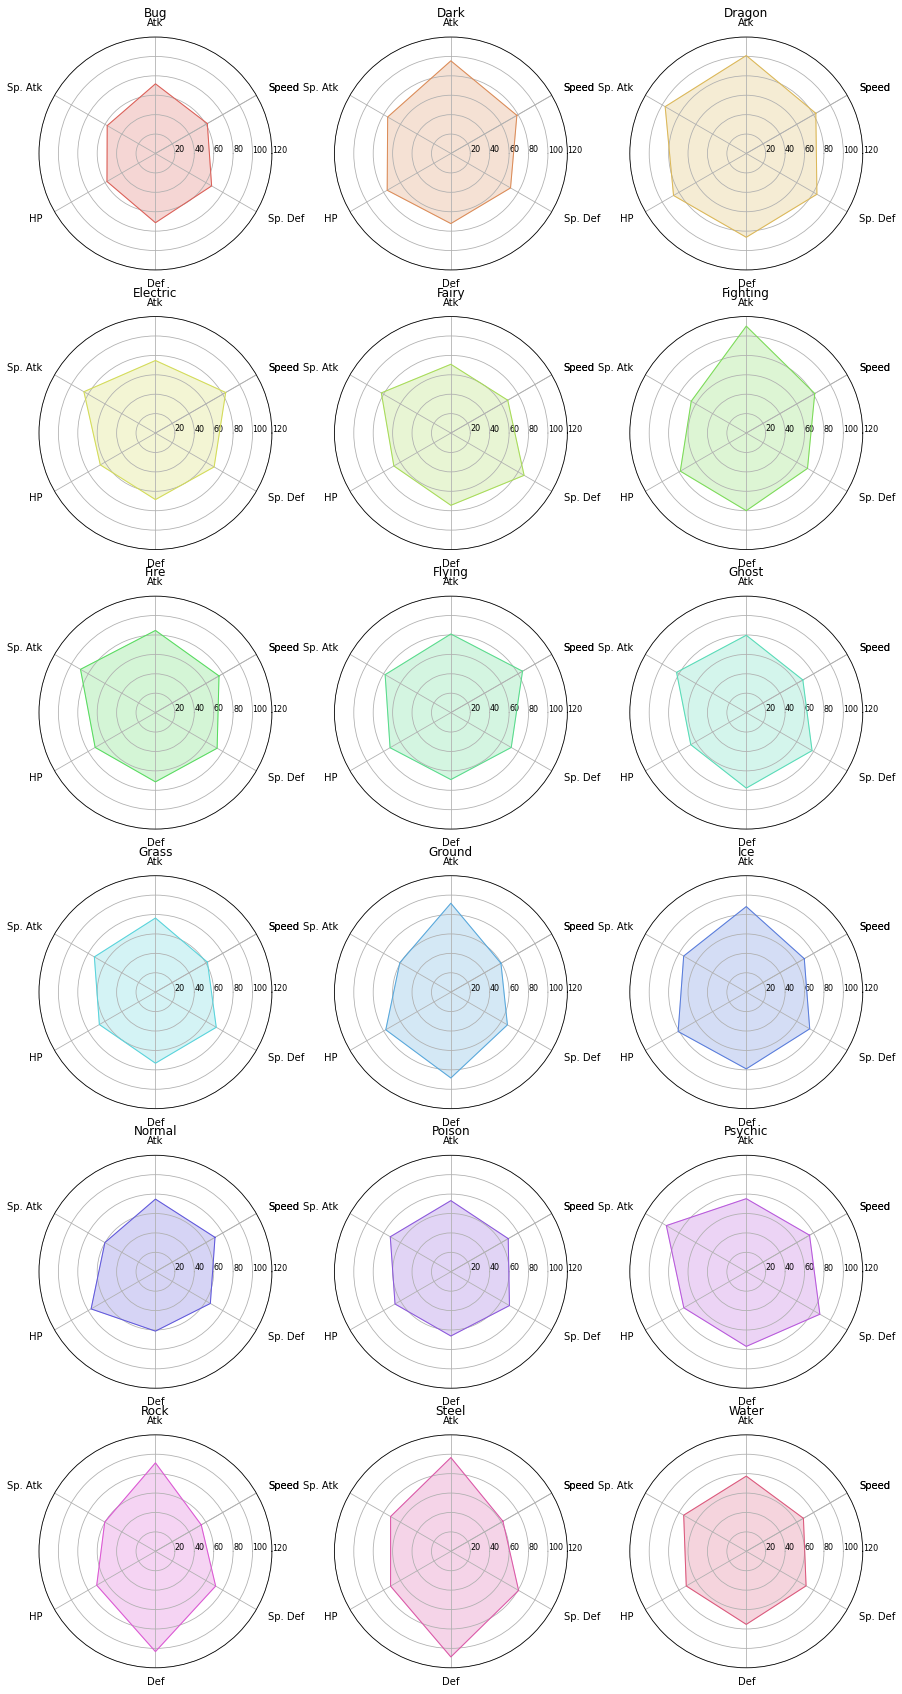

In [15]:
radar_charts_type()

Analyzing each type chart, we can see already some interesting aspects:

- <b>Dragon</b> is the type with the biggest shaded area, which means the type with the highest overall stats;
- <b>Fighting</b> is the type with the highest attack stat, which corresponds to the expected;
- <b>Psychic</b> is the type with the highest special attack stat, followed by <b>Dragon</b> and <b>Fire</b> types;
- <b>Ground</b>, <b>Rock</b> and <b>Steel</b> types have similar stats shape, with higher defense stat, being <b>Steel</b> the highest of them.

Now we proceed by showing the stats charts by comparing common Pokémon to the strong groups, which are Legendary, Mythical, Ultra Beasts and two battle mechanics: Mega Evolutions and Gigantamax.

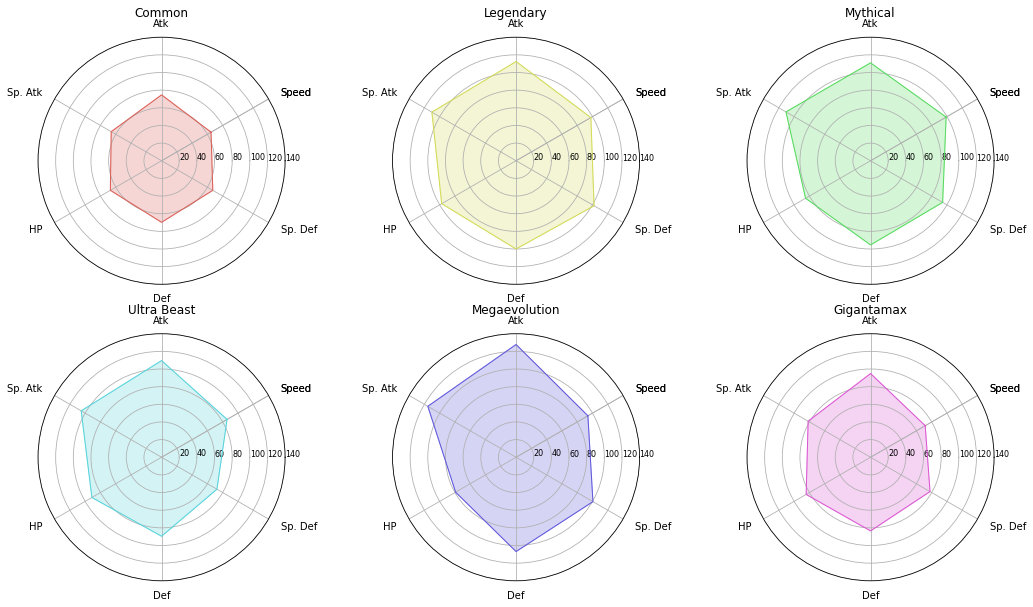

In [16]:
radar_charts_group()

- With these charts we can see the visible difference between common Pokémon to the other groups;
- <b>Legendary</b> and <b>Mythical</b> have similar shapes, being <b>Legendary</b> slightly higher;
- <b>Ultra Beasts</b> is a special group of Pokémon, extradimensional beings, originated from Ultra Space. They are stronger than common ones, but not as much as <b>Legendary</b>;
- <b>Mega</b> evolutions have the biggest shaded area, meaning highest stats. This is due the fact that there are <b>Legendary</b> Pókemon that can also Mega evolve, increasing even more their stats;
- <b>Gigantamax</b>, however, impacts on the Pokémon physical size and only its HP, therefore the shaded area is more contained.

Moving on, we show below Pokémon with highest value of each stat, as well as the one with the highest total.

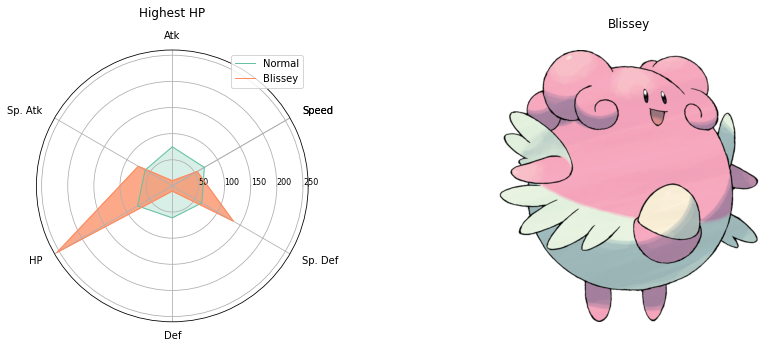

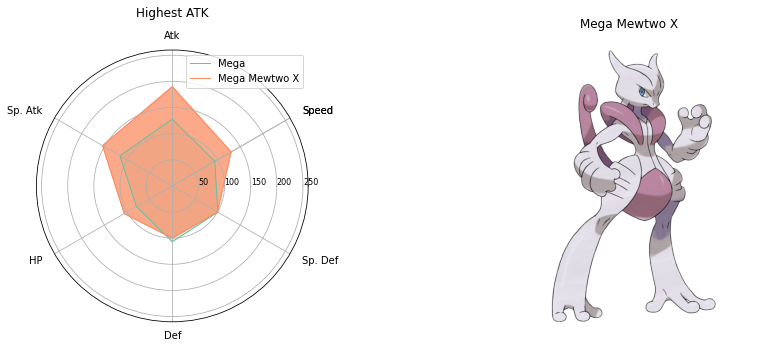

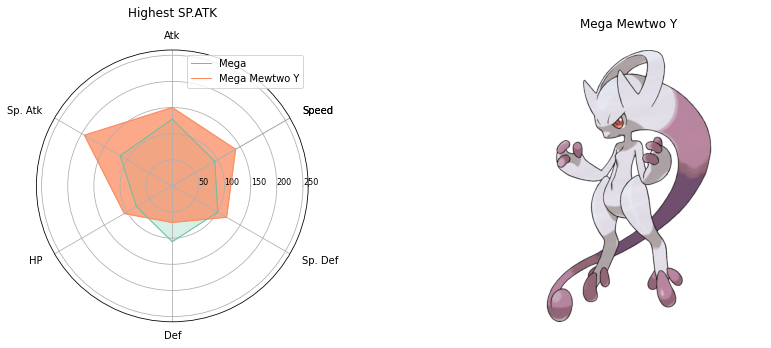

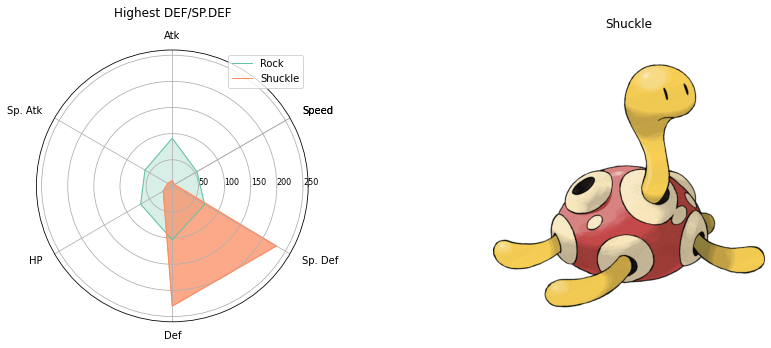

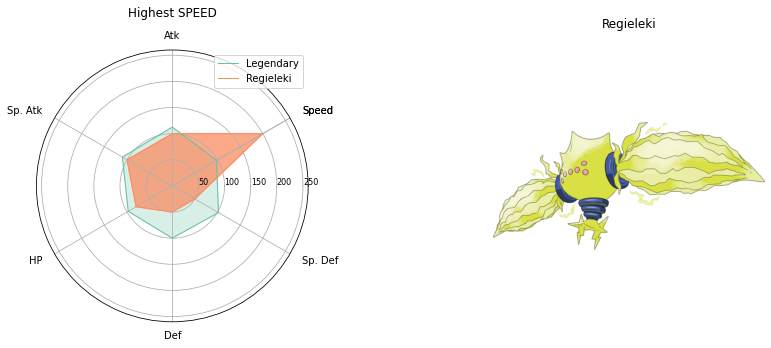

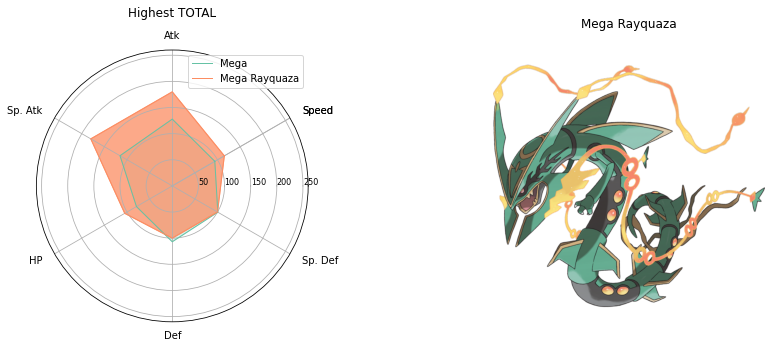

In [17]:
show_highest('hp')
show_highest('atk')
show_highest('spatk')
show_highest('def')
show_highest('spd')
show_highest('total')

It is worth saying that we considered only those obtainable Pokémon (therefore excluding Eternamax Eternatus).

Also for highest defense, we have three Pokémon with same value: Shuckle (showed), Mega Steelix and Mega Aggron, but since Shucke has also the highest special defense, it was chosen here.

And for total stats, Mega Rayquaza, Mega Mewtwo X and Mega Mewtwo Y have the same total, but Mega Rayquaza was chosen due to its better distribution of the stats.

# 2. PCA Representation of Base Stats

For a better overall representation, we now apply Principal Component Analysis (PCA) transformation to the base stats.<br>
The PCA transformation performs mathematical matrix calculation, in order to separate the highest variance of the data. In other words, it will reproduce major part of the data in a small number of dimensions.

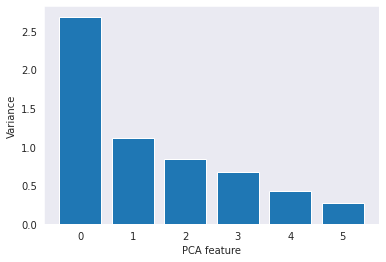

In [23]:
pca(df)

Through the first two Principal Components, we are able to represent all six base stats variances in a two dimensional space.<br>
Let us analyze how the base stats are distributed over these two principal components.

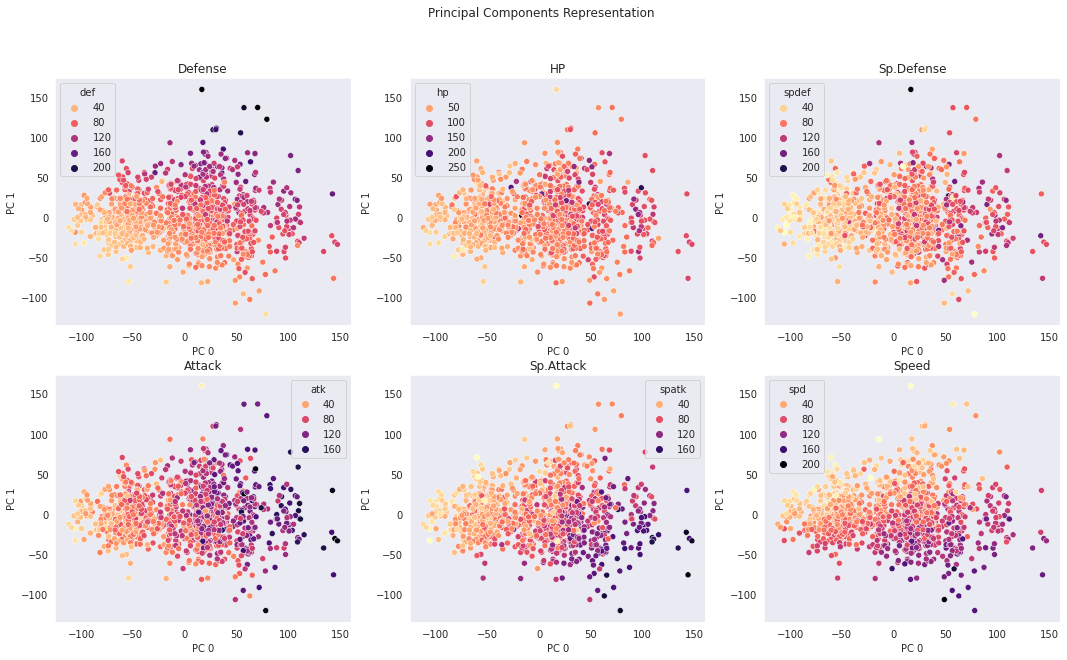

In [24]:
pc(df)

We can identify some patterns.<br>
<b>Speed</b> is overal oriented in the opposite direction of <b>Defense</b>, meaning that Pokémon with high <b>Defense</b> are <b>Slow</b> and vice-versa.<br>
We can also see <b>Defense</b> is not so correlated to <b>Special Defense</b>, however <b>Attack</b> is more correlated to <b>Special Attack</b>, meaning it is more common to have Pokémon with both <b>Attack</b> and <b>Special Attack</b> stats high together.

With this representation we can also identify some groups behavior.

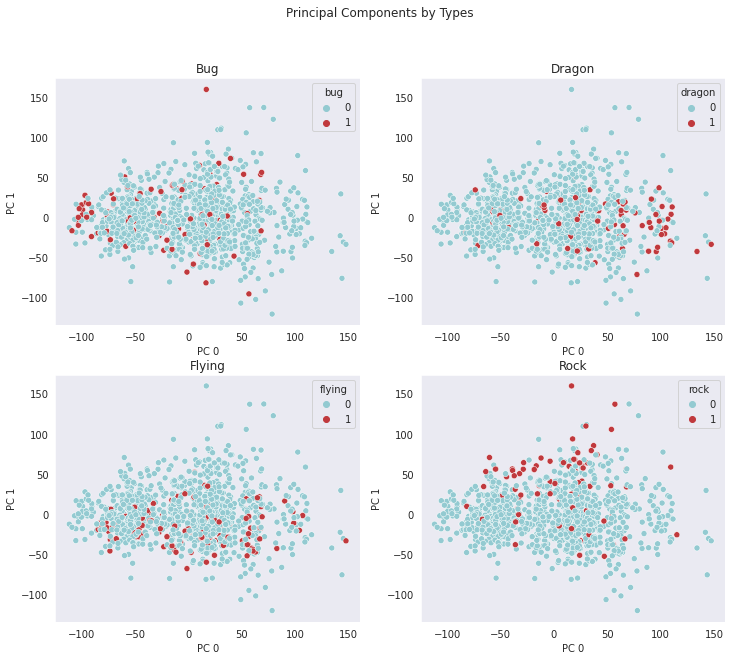

In [25]:
pc_type(df)

Here we analyze four distinct types:
- First the <b>bug</b> type, they have a cluster in the left side, indicating overall they have all lower stats;
- The <b>dragon</b> type has a cluster in the right side, indicating overall they have all high stats;
- The <b>flying</b> type is located more in the lower side, indicating overall they are faster (higher speed);
- The <b>rock</b> type is located more in the upper side, indicating overall they have higher defense.

We can also visualize Pokémon groups in PC representation.

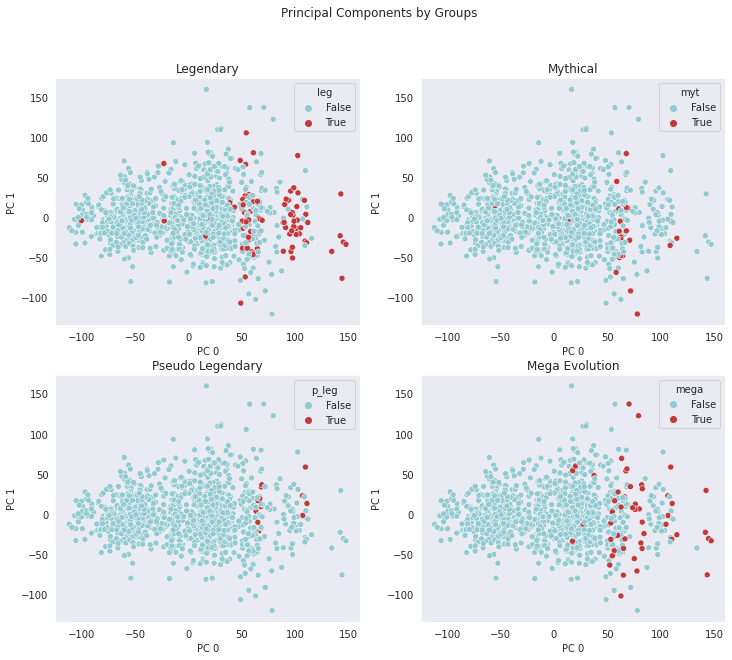

In [26]:
pc_group(df)

Above figures show Legendary, Mythical, Pseudo Legendary and Mega Evolution groups in PC representation.<br>
We can see that all four groups are located in the right side, indicating overall they have higher stats.

Our last analysis on PC representation is about generation. Generation 6 has a different behavior from the others, it is the one that introduced Mega Evolutions. Due to this, it is more grouped to the right side. The other generations have a more sparse distribution, like the one to the right, corresponding to generation 8.

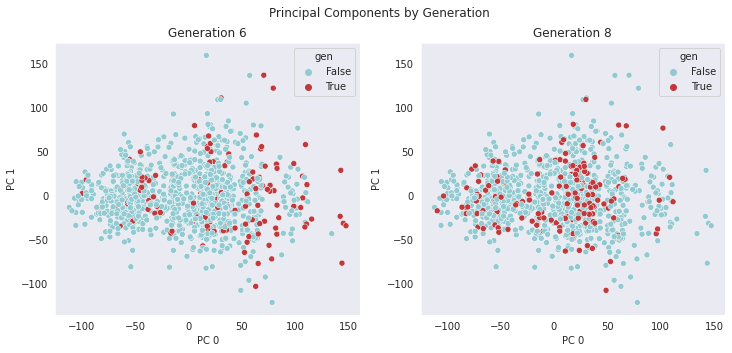

In [27]:
pc_gen(df)

# 3. t-SNE Representation of Stats and Moves

Up until now we only used the base stats of Pokémon for the analysis.<br>
However there is an another main feature, which is mandatory to the battles, which is the moves the Pokémon can use.<br>
There is a total of <b>900 moves</b>, that have a series of features like type, category, power, accuracy and secondary effects. In fact our table of moves has 900 rows and 87 columns (after one-hot encoding the moves features).<br>
Each Pokémon has a limited list of moves it can learn, while it actually can only use and memorize 4 at the same time. We won't dive deeper in the moves details.

Representing each Pokémon with its possible moves stats, we have a high dimensional data (<b>88181 rows by 110 columns</b>).<br>
In order to represent this, we will apply the t-SNE (t-Distributed Stochastic Neighbor Embedding) dimension reduction, which produces a two dimensional visualization of the entire data.<br>
The t-SNE is well suited for high-dimension visualizations and captures local similarities, performing non-linear transformations on the data.<br> 
For this transformation we use the useful informations, which are the Pokémon base stats, type, and moves it can learn.

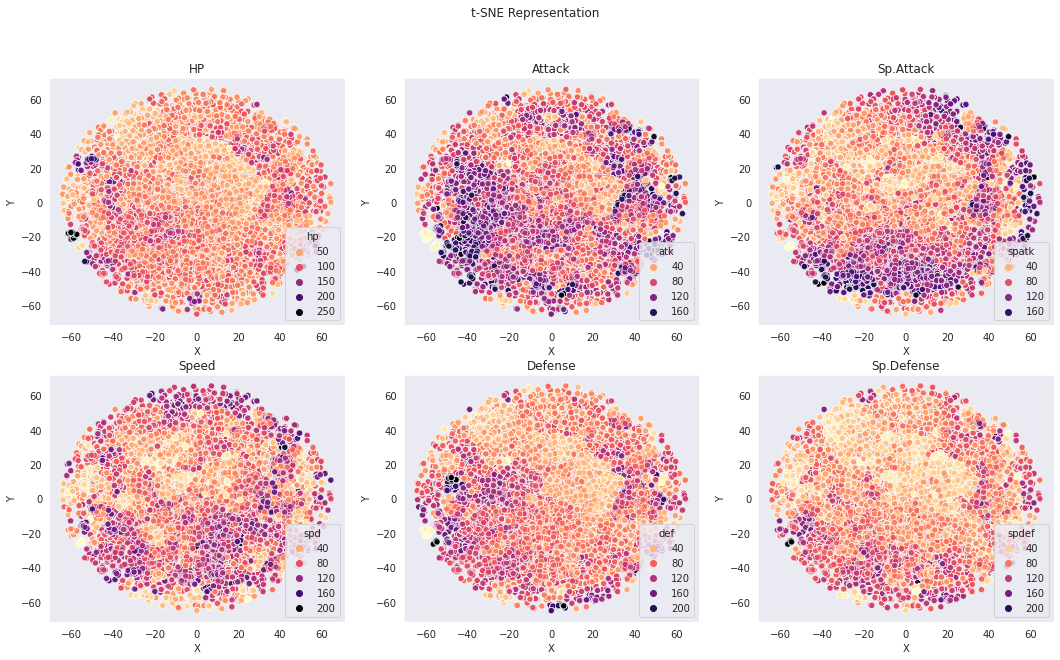

In [47]:
tsne()

The t-SNE presented here captures information from all Pokémon and their respective moves.<br>
In this visualization, it shows that higher stats are distributed around the space, closer to its borders, while points closer to the center correspond to lower stats.

Investigating the Pokémon groups we can confirm again what was presented with PCA. Legendary and Mega Evolutions are closer to the border because they represent stronger Pokémon, with higher stats.

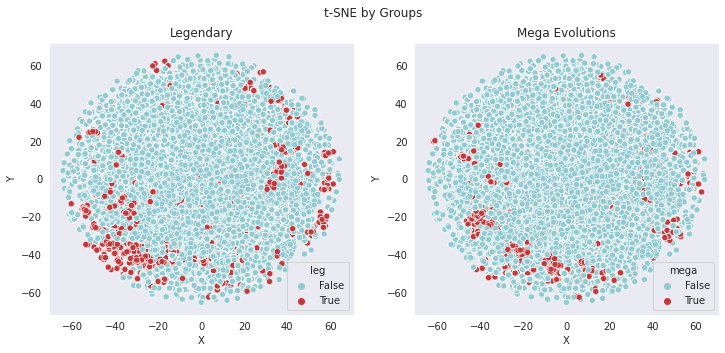

In [48]:
tsne_group()

With this representation we are able to perform analysis on types as well.<br>
Below we compare the Pokémon type against moves types for the three initial types: <b>Grass</b>, <b>Fire</b> and <b>Water</b>.

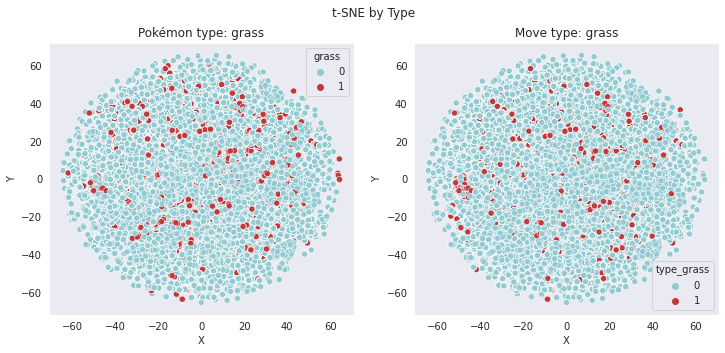

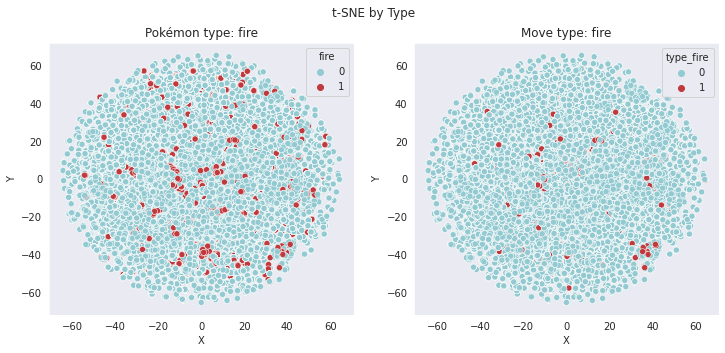

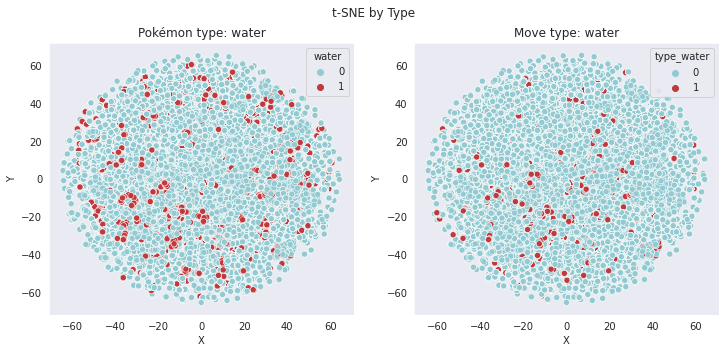

In [49]:
tsne_type('grass')
tsne_type('fire')
tsne_type('water')

With the figures presented above, we can see that Pokémon with initial types (grass, fire and water) are well spread around the space, indicating they assume varied behavior range.<br>
However fire type moves are less sparse, indicating they have more similar behavior than the other two types.

Below we present the representation for <b>Normal</b>, <b>Psychic</b> and <b>Dragon</b> types.

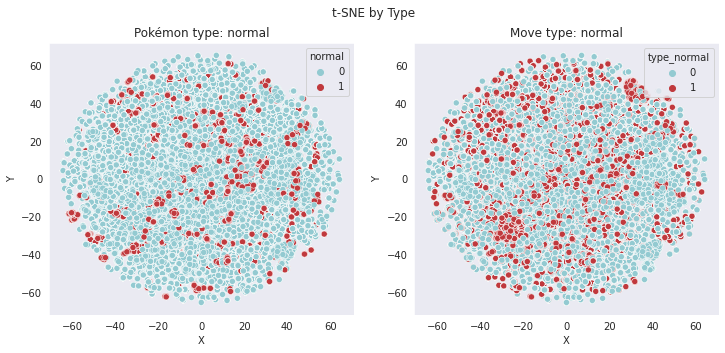

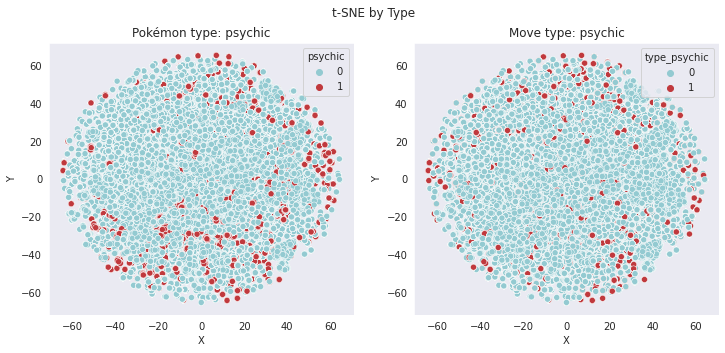

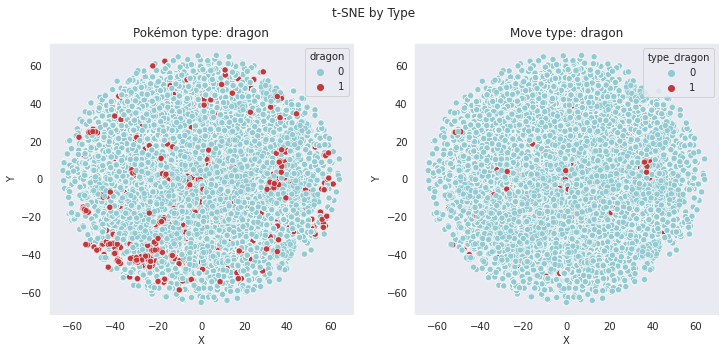

In [50]:
tsne_type('normal')
tsne_type('psychic')
tsne_type('dragon')

Normal type is the most common, for both Pokémon and moves.<br>
In the right graph we can see there are a lot more points, indicating Pokémon from other types that also have normal type moves.

Psychic type is presented here because they showed a different behavior: both Pokémon and move are more close to the border than other types. This indicates that Psychic Pokémon and moves are slightly stronger than the other types.

While there is a significant number of Dragon Pokémon, we have just a small number of Dragon type moves, and they are much more clustered together, indicating their similar behavior.